## Intro

- Notebook for creating rotated MNIST (MNIST-R) dataset  
- Settings in the Parameters section (below) are used to set how many rotated copies of each image to create, and the range of rotations  

## Parameters

In [1]:
rot_range = [-90, 90]         # Range of possible rotations
rots_per_img = 8              # Number of rotations per image

## For quicker
rots_per_img = 1
rots_per_img = 4


save_loc = "saved/mnist_rot"

## Imports

In [2]:
from keras.datasets import mnist
import numpy as np
from scipy import ndimage
from my_lib.save_load import save_datasets


### Create Rotatated Dataset

In [3]:
# original MNIST data
(xo_train, yo_train), (xo_test, yo_test) = mnist.load_data()
xo_train.shape, yo_test.shape

((60000, 28, 28), (10000,))

In [4]:
rot_div = (rot_range[1] - rot_range[0])/rots_per_img
rot_div

45.0

In [5]:
shp = xo_train.shape
x_train = np.zeros((shp[0]*rots_per_img, shp[1],shp[2]))
y_train = np.zeros((shp[0]*rots_per_img)) 
rots_train = np.zeros((shp[0]*rots_per_img)) 

shp = xo_test.shape
x_test = np.zeros((shp[0], shp[1], shp[2]))
y_test = np.zeros((shp[0]))
rots_test = np.zeros((shp[0])) 

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((240000, 28, 28), (240000,), (10000, 28, 28), (10000,))

In [7]:
# news = xo_train.shape[1] *xo_train.shape[2]

for i in range(x_train.shape[0]):
    org_i = i // rots_per_img
    rand = np.random.random()
    rot = rot_range[0] + rot_div*(i%rots_per_img) + rand*rot_div
    
    x_train[i] = ndimage.rotate(xo_train[org_i], rot, reshape=False)#.reshape((news))
    y_train[i] = yo_train[org_i]
    rots_train[i] = rot
    
    
for i in range(x_test.shape[0]):
    org_i = i // rots_per_img
    rand = np.random.random()
    rot = rot_range[0] + rot_div*(i%rots_per_img) + rand*rot_div
    
    
    x_test[i] = ndimage.rotate(xo_test[org_i], rot, reshape=False)#.reshape((news))
    y_test[i] = yo_test[org_i]
    rots_test[i] = rot

### Save

In [10]:
save_data = (x_train,y_train,rots_train,x_test,y_test,rots_test)
dnames = ("x_train","y_train","rots_train","x_test","y_test","rots_test")

save_datasets(save_loc, save_data, dnames)

### View

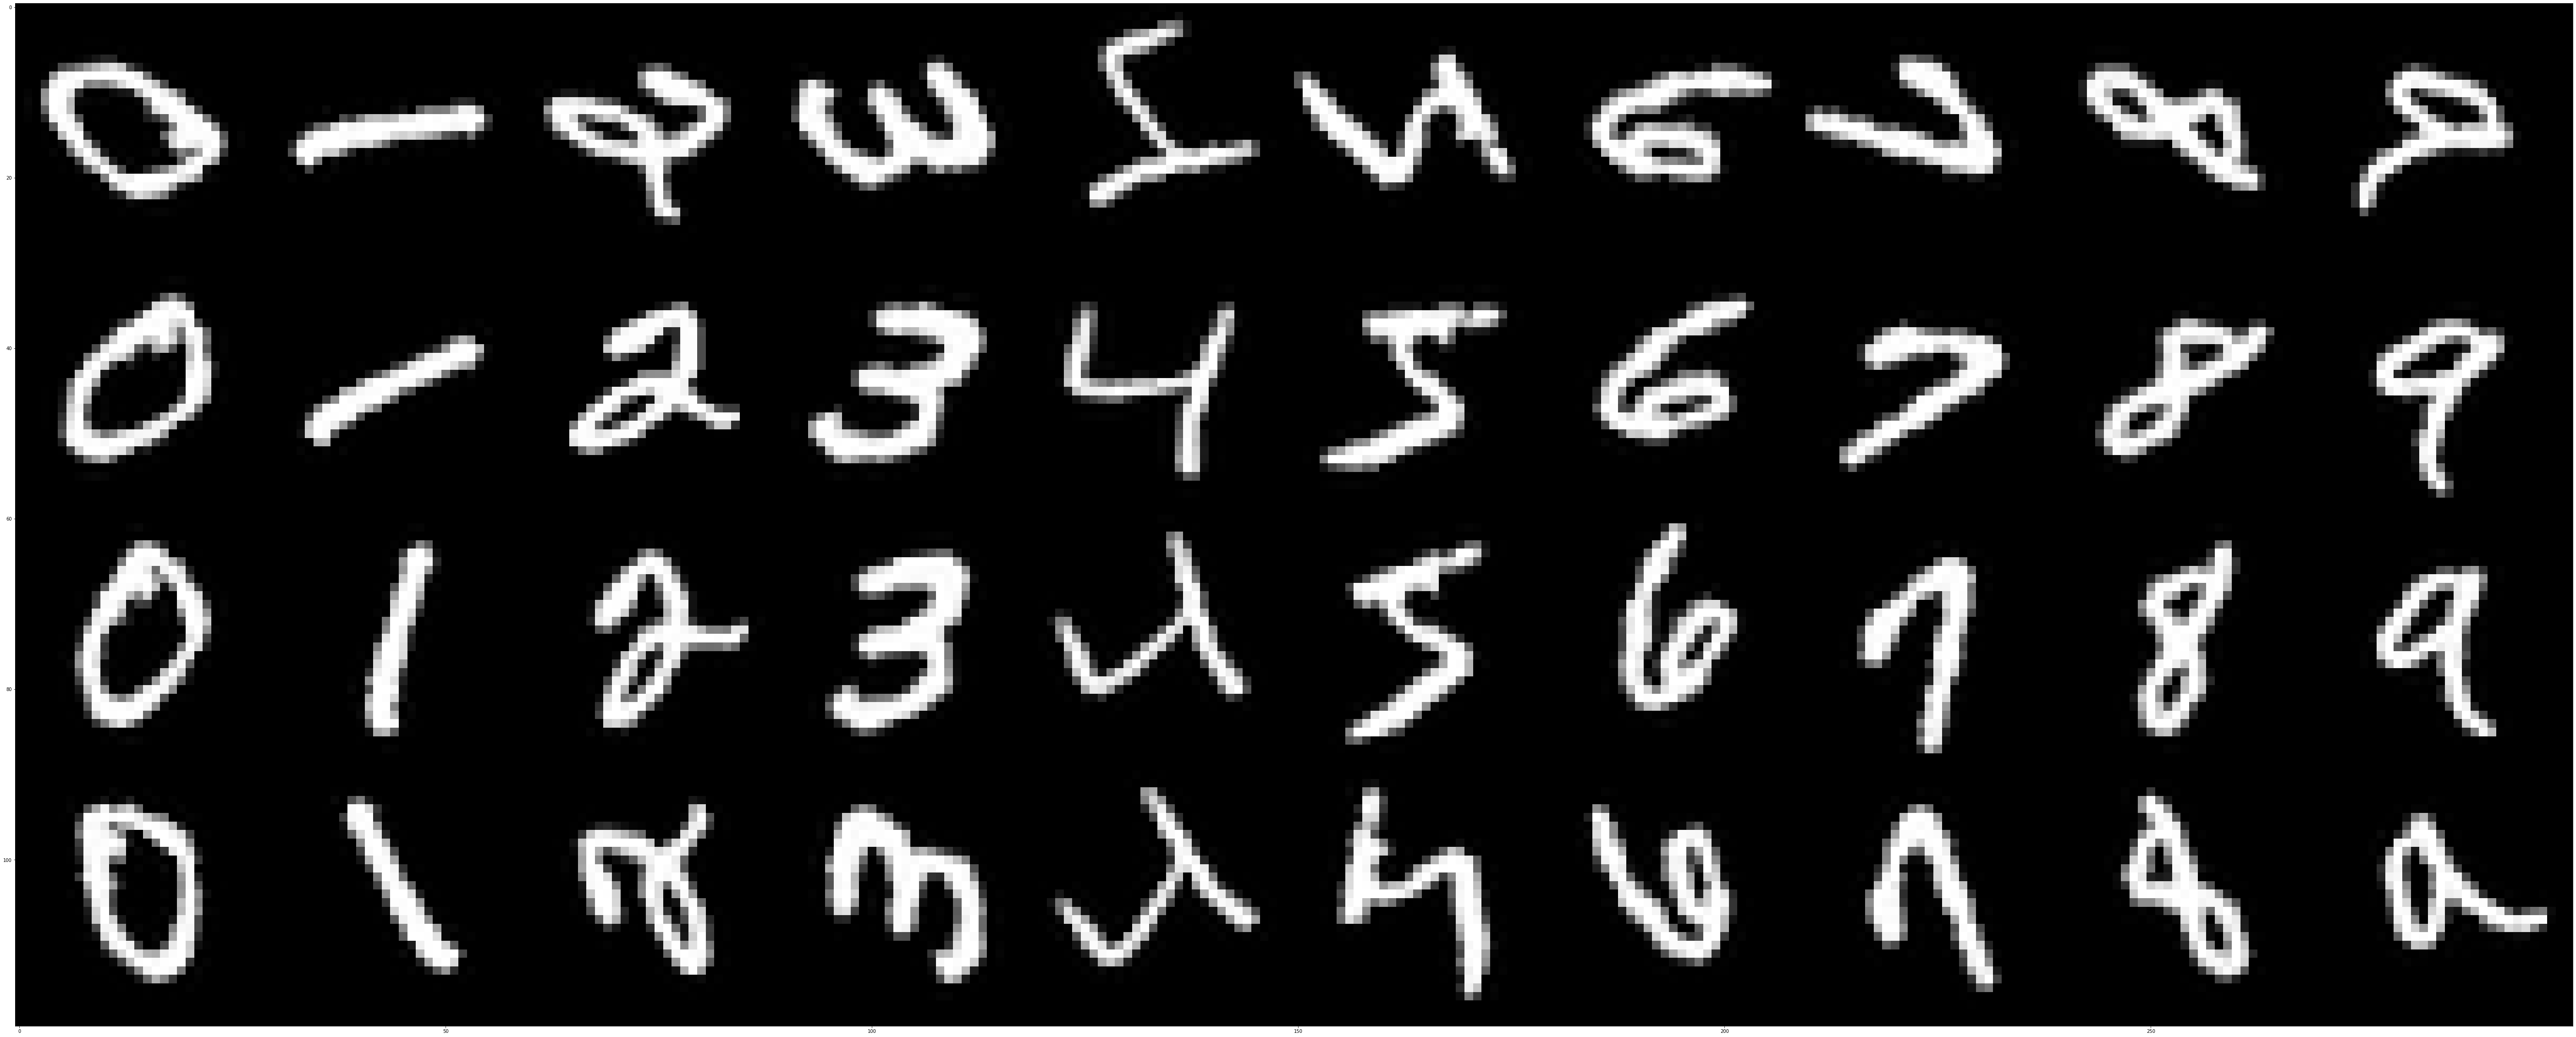

In [12]:
from matplotlib import pyplot as plt
n_cats = rots_per_img
start_i = 0
skip = 1

filled = np.zeros((n_cats, 10,), dtype=bool)
n_each = 10
step = 0.33
n_to_show = 6
spc = 2


to_show = np.zeros(((28+spc)*n_cats, (28+spc)*10, ))
for i, (img, lbl, thic) in enumerate(zip(x_train, y_train, rots_train)):
    
    if i < start_i or i % skip != 0:
        continue

    col = int(lbl)
    row = int((thic -rot_range[0])//rot_div)

    
    if not filled[row, col]:
        x_start = (28+spc)*row
        y_start = (28+spc)*col

        to_show[x_start: x_start + 28, y_start: y_start + 28] = img.reshape((28,28))
        filled[row, col] = True
    
    if np.sum(filled) == filled.size:
        break
        
plt.figure(figsize = (100, 100) )
plt.imshow(to_show, cmap='Greys_r')
plt.show()